### XGBoost

##### Load the Dataset and Necessary Packages

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from  sklearn.metrics import mean_squared_error


df = pd.read_csv("data-fuel-consumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
xg_reg = xgb.XGBRegressor(objective='reg:linear', gamma=0, colsample_bytree=.5, num_boost_round=100,learning_rate=1, scale_pos_weight=1)
xg_reg.fit(X_train, y_train)

[19:34:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', learning_rate=1,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_boost_round=100, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, ...)

In [12]:
y_preds = xg_reg.predict(X_test)

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, y_preds))
print('MSE:', metrics.mean_squared_error(y_test, y_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
accuracy = xg_reg.score(X_test,y_test)
print('Accuracy:',accuracy*100,'%')
print('R2:', r2_score(y_test, y_preds))

MAE: 6.207861736927448
MSE: 194.81553509067874
RMSE: 13.95763357774801
Accuracy: 95.38925471708116 %
R2: 0.9538925471708116


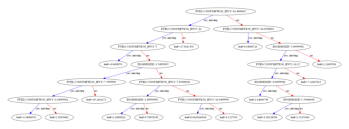

In [16]:
xgb.plot_tree(xg_reg,num_trees=4)
plt.show()